# 샘플 데이터와 Decision Tree Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
예시에서 사용할 샘플 데이터를 생성

In [ ]:
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))

데이터는 하나의 변수를 가지며 변수에 따른 정답은 아래처럼 생김

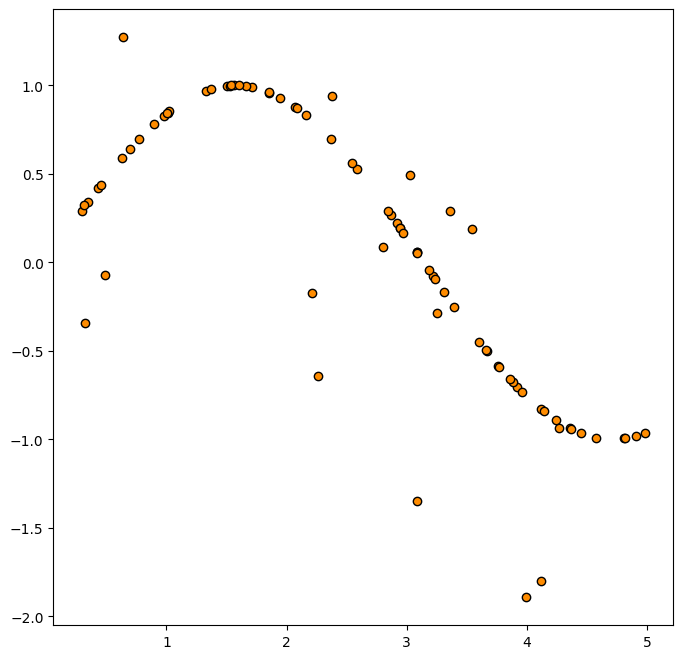

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor='black', c='darkorange')

### 1.2 Viz Data
시각화를 위한 데이터 생성

In [ ]:
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [ ]:
viz_test_data[:5]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04]])

## 2. Decision Tree Regressor
Tree의 분할이 이루어질 때마다 어떻게 예측을 하는지 알아보기

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

### 2.1 분할이 없을 경우
분할이 없는 경우에는 학습 데이터의 평균으로 예측을 진행

In [ ]:
viz_test_pred = np.repeat(label.mean(), len(viz_test_data))

plot으로 예측선 확인해보기

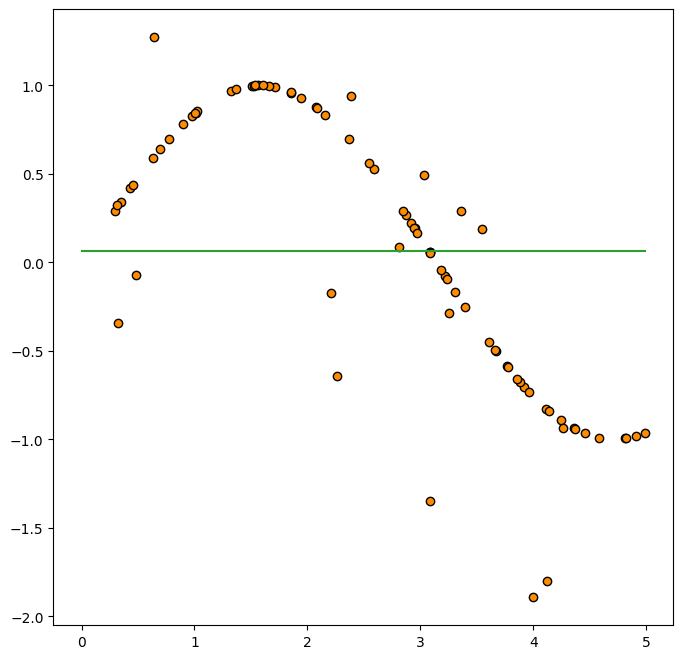

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color="C2")

분할이 없을 때의 Mse variance를 계산하면 다음과 같음 

In [ ]:
train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

In [ ]:
print(f"no divide mse variance: {mse_var:.3f}")

no divide mse variance: 0.580


### 2.2 첫 번쨰 분할

In [ ]:
first_divide = DecisionTreeRegressor(max_depth=1)

In [ ]:
first_divide.fit(data, label)

DecisionTreeRegressor(max_depth=1)

In [ ]:
first_divide_pred = first_divide.predict(viz_test_data)

In [ ]:
# 어느 지점에서 분할됐는지 threshold 확인
first_divide.tree_.threshold

array([ 3.08797491, -2.        , -2.        ])

첫번째로 분할돼서 나누어진 영역을 그리면 아래와 같음 

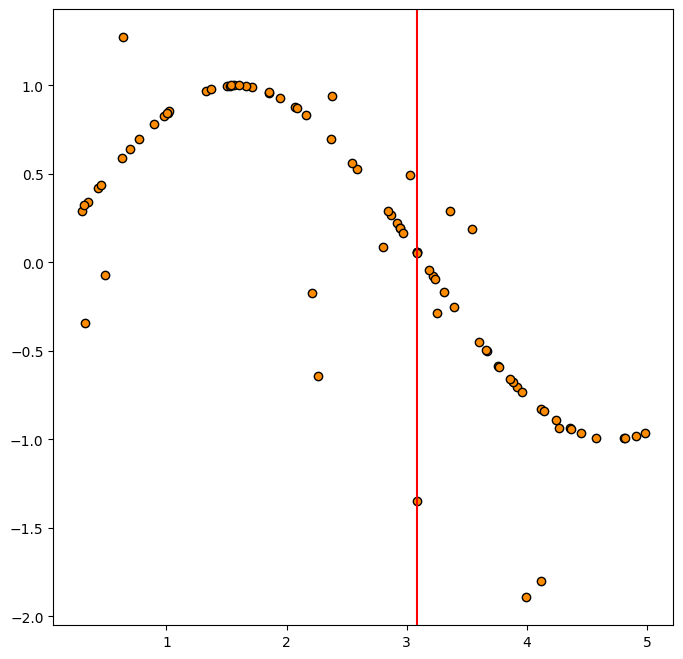

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor='black', c='darkorange')
plt.axvline(first_divide.tree_.threshold[0], color="red")

분할이 이루어진 각 영역에서 다시 평균을 계산

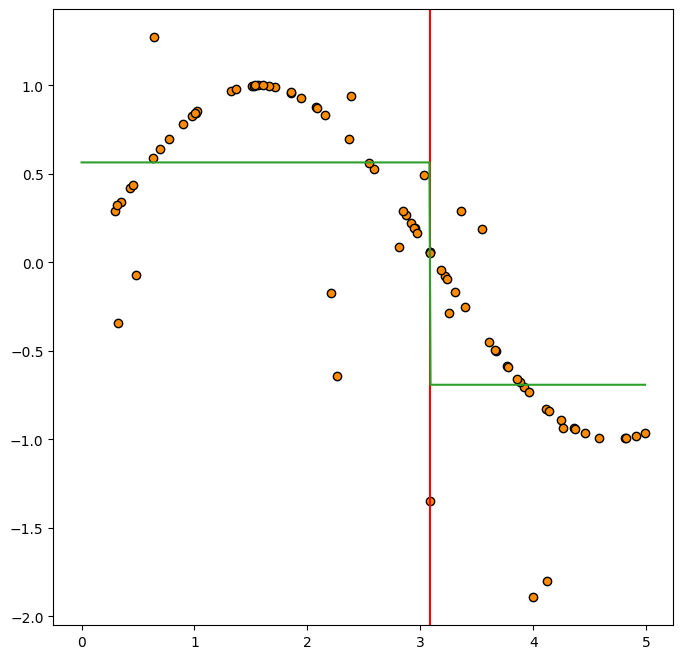

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor='black', c='darkorange')
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")

Treef를 시각화하기 위해서는 `plot_tree`함수를 이용하면 됨.  
Tree를 시각화하면 아래와 같음

[Text(0.5, 0.75, 'x[0] <= 3.088\nsquared_error = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(0.25, 0.25, 'squared_error = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(0.75, 0.25, 'squared_error = 0.236\nsamples = 32\nvalue = -0.691')]

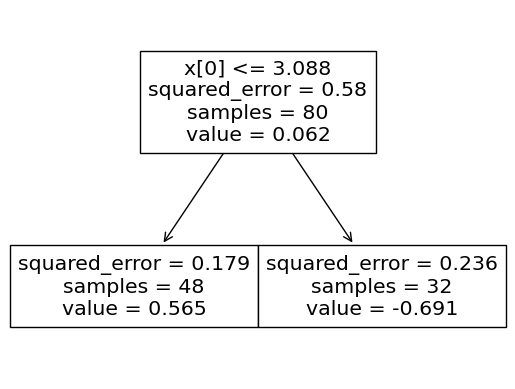

In [ ]:
plot_tree(first_divide)

### 2.3 두 번째 분할

In [ ]:
second_divide = DecisionTreeRegressor(max_depth=2)

In [ ]:
second_divide.fit(data, label)

DecisionTreeRegressor(max_depth=2)

In [ ]:
second_divide_pred = second_divide.predict(viz_test_data)

In [ ]:
second_divide.tree_.threshold

array([ 3.08797491,  2.18504608, -2.        , -2.        ,  3.90321755,
       -2.        , -2.        ])

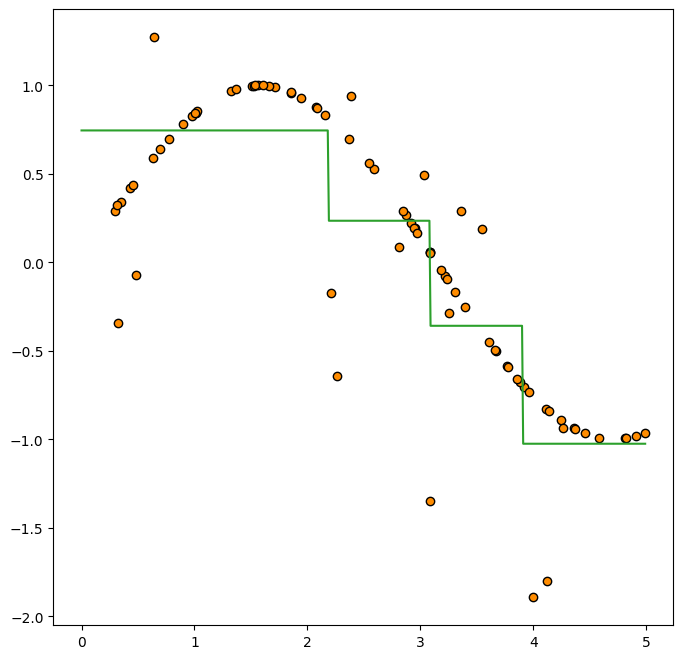

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor='black', c='darkorange')
plt.plot(viz_test_data, second_divide_pred, color="C2")

[Text(0.5, 0.8333333333333334, 'x[0] <= 3.088\nsquared_error = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(0.25, 0.5, 'x[0] <= 2.185\nsquared_error = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.119\nsamples = 31\nvalue = 0.745'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.12\nsamples = 17\nvalue = 0.235'),
 Text(0.75, 0.5, 'x[0] <= 3.903\nsquared_error = 0.236\nsamples = 32\nvalue = -0.691'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.147\nsamples = 16\nvalue = -0.358'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.104\nsamples = 16\nvalue = -1.025')]

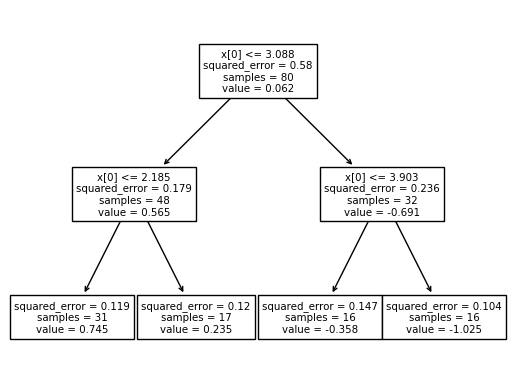

In [ ]:
plot_tree(second_divide)

## 3. Depth에 따른 변화

In [ ]:
shallow_depth_tree = DecisionTreeRegressor(max_depth=2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)

In [ ]:
shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)

DecisionTreeRegressor(max_depth=5)

In [ ]:
shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

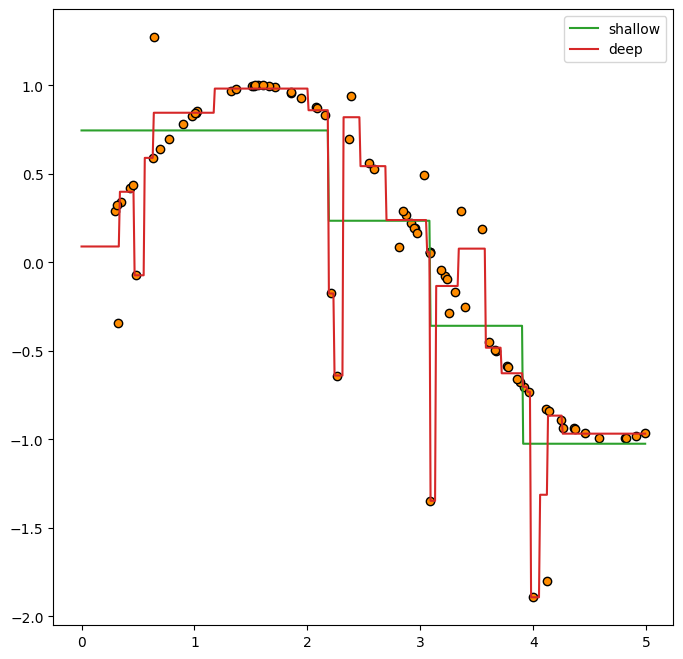

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor='black', c='darkorange')
plt.plot(viz_test_data, shallow_pred, color="C2", label="shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend()

max_depth=5인 경우 이상치 데이터까지 고려하기 때문에 중간중간 푹푹 꺼지는 구간 발생  
-> decision tree 모델은 이상치에 영향을 크게 받음